In [1]:
import MetaTrader5 as mt
import pandas as pd
from datetime import datetime

import numpy as np
from sklearn.linear_model import LinearRegression #
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import mplfinance as mplf
import warnings
warnings.filterwarnings('ignore')

In [2]:
mt.initialize()

True

In [3]:
login = 114490112
password = '123456Aa@'
server = 'Exness-MT5Trial6'

mt.login(login, password, server)

True

In [4]:
#Get acccount infomation
account_info = mt.account_info()
print(account_info)

#Getting specific account data
login_number = account_info.login
balance = account_info.balance
equity = account_info.equity
print()
print('login:', login)
print('balance:', balance)
print('equity:', equity)

AccountInfo(login=114490112, trade_mode=0, leverage=1000, limit_orders=1024, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=9957.08, credit=0.0, profit=37.98, equity=9995.06, margin=85.63, margin_free=9909.43, margin_level=11672.381174821909, margin_so_call=30.0, margin_so_so=0.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Pro', server='Exness-MT5Trial6', currency='USD', company='Exness Technologies Ltd')

login: 114490112
balance: 9957.08
equity: 9995.06


In [5]:
#OHLC data get
ohlc_data = pd.DataFrame(mt.copy_rates_range("XAUUSD", 
                                             mt.TIMEFRAME_D1, 
                                             datetime(2015, 1, 1), 
                                             datetime.now()))
ohlc_data['time'] = pd.to_datetime(ohlc_data['time'], unit='s')

ohlc_data.drop('real_volume', axis=1, inplace=True)
ohlc_data.rename(columns={'tick_volume': 'volume'}, inplace=True)
ohlc_data.set_index('time', inplace=True)
ohlc_data



,open,high,low,close,volume,spread
time,,,,,,
2018-06-28,1252.927,1254.272,1245.947,1248.615,81126,0
2018-06-29,1248.587,1255.614,1246.083,1252.630,78921,0
2018-07-01,1253.063,1254.194,1252.837,1253.411,2197,0
2018-07-02,1253.376,1253.626,1239.692,1242.147,75155,0
2018-07-03,1242.147,1256.851,1237.953,1254.966,76703,0
...,...,...,...,...,...,...
2023-06-26,1925.331,1933.317,1920.940,1922.522,93535,0
2023-06-27,1922.601,1930.739,1910.837,1915.422,282019,0
2023-06-28,1915.489,1917.274,1902.635,1909.719,282866,0


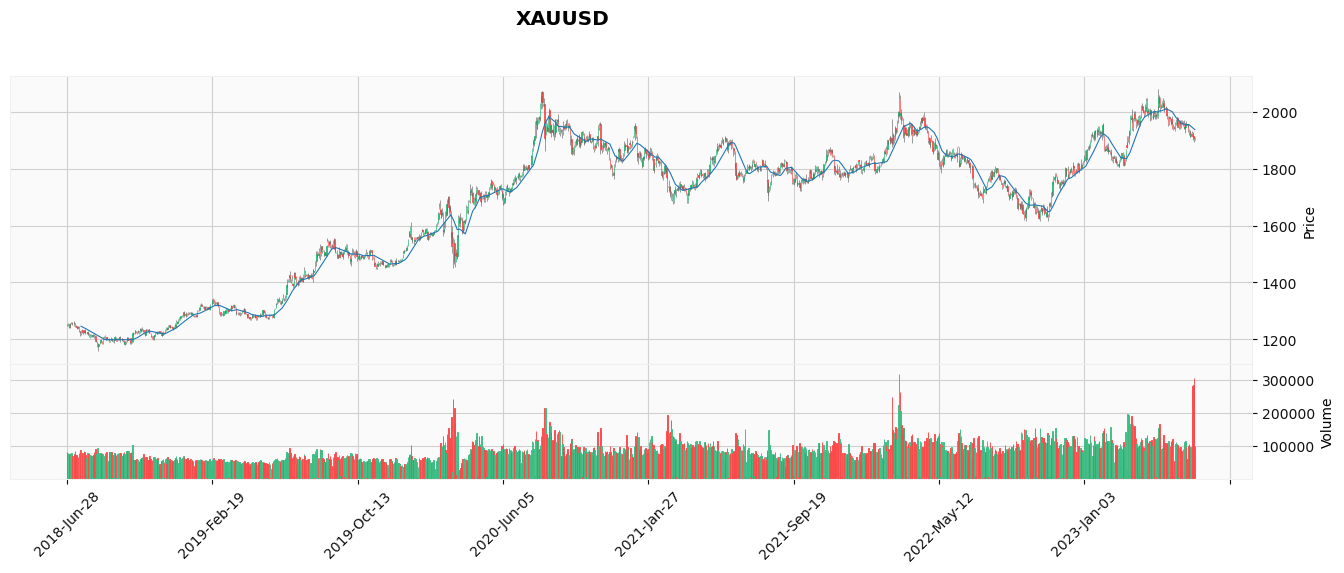

In [6]:
mplf.plot(ohlc_data,figratio=(60,20),
          title='XAUUSD',
          type='candle',
          mav=(20),volume=True,
          style="yahoo")
mplf.show()

In [7]:
from feature_transform import generate_feature
ohlc_data = generate_feature(ohlc_data)

ohlc_data.head(10)[['close', 'high_t1', 'low_t1']]

,close,high_t1,low_t1
time,,,
2018-06-28,1248.615,1255.614,1246.083
2018-06-29,1252.630,1254.194,1252.837
2018-07-01,1253.411,1253.626,1239.692
2018-07-02,1242.147,1256.851,1237.953
2018-07-03,1254.966,1261.093,1254.023
2018-07-04,1256.958,1259.724,1251.304
2018-07-05,1257.311,1258.791,1252.820
2018-07-06,1254.874,1256.598,1255.713
2018-07-08,1256.436,1265.877,1255.469


In [8]:
# Find rows with NaN values
nan_rows = ohlc_data[ohlc_data.isnull().any(axis=1)]

# Print the rows with NaN values
print(nan_rows)

                open      high       low     close    volume  spread  \
time                                                                   
2018-06-28  1252.927  1254.272  1245.947  1248.615   81126.0     0.0   
2018-06-29  1248.587  1255.614  1246.083  1252.630   78921.0     0.0   
2018-07-01  1253.063  1254.194  1252.837  1253.411    2197.0     0.0   
2018-07-02  1253.376  1253.626  1239.692  1242.147   75155.0     0.0   
2018-07-03  1242.147  1256.851  1237.953  1254.966   76703.0     0.0   
2018-07-04  1254.965  1261.093  1254.023  1256.958   59800.0     0.0   
2018-07-05  1256.953  1259.724  1251.304  1257.311   79007.0     0.0   
2018-07-06  1257.358  1258.791  1252.820  1254.874   70035.0     0.0   
2018-07-08  1255.890  1256.598  1255.713  1256.436    1155.0     0.0   
2018-07-09  1256.413  1265.877  1255.469  1258.399   68889.0     0.0   
2018-07-10  1258.387  1260.328  1247.370  1255.953   74833.0     0.0   
2018-07-11  1255.951  1256.064  1241.553  1242.719   82595.0    

In [9]:
# Drop the first 25 rows
ohlc_data = ohlc_data.drop(ohlc_data.index[:25])
ohlc_data = ohlc_data.drop(ohlc_data.index[-1])


In [10]:
data_feature_train = ohlc_data[:'2022-01-01']
data_feature_validate = ohlc_data['2022-01-01':]
print(data_feature_train.shape)
print(data_feature_validate.shape)


(1064, 73)
(463, 73)


In [11]:
data_feature_train.columns


Index(['open', 'high', 'low', 'close', 'volume', 'spread', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'open_diff_pct_p1', 'open_diff_pct_p2',
       'open_diff_pct_p3', 'open_diff_pct_p7', 'close_p1', 'close_p2',
       'close_p3', 'close_p4', 'close_p5', 'low_p1', 'low_p2', 'low_p3',
       'low_p4', 'low_p5', 'high_p1', 'high_p2', 'high_p3', 'high_p4',
       'high_p5', 'high_t1', 'low_t1', 'close_diff_p1', 'close_diff_p2',
       'close_diff_p3', 'close_diff_p7', 'close_diff_pct_p1',
       'close_diff_pct_p2', 'close_diff_pct_p3', 'close_diff_pct_p7',
       'volume_p1', 'volume_p2', 'volume_p3', 'volume_p7', 'volume_diff_p1',
       'volume_diff_p2', 'volume_diff_p3', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p7', 'on_balance_volume', 'rsi_window_14',
       'rsi_window_7', 'bollinger_mavg_20', 'bollinger_lband_20',
       'bolling

In [12]:
X_train = data_feature_train[['open', 'high', 'low', 'close', 'volume', 'spread', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'open_diff_pct_p1', 'open_diff_pct_p2',
       'open_diff_pct_p3', 'open_diff_pct_p7', 'close_p1', 'close_p2',
       'close_p3', 'close_p4', 'close_p5', 'low_p1', 'low_p2', 'low_p3',
       'low_p4', 'low_p5', 'high_p1', 'high_p2', 'high_p3', 'high_p4',
       'high_p5', 'close_diff_p1', 'close_diff_p2',
       'close_diff_p3', 'close_diff_p7', 'close_diff_pct_p1',
       'close_diff_pct_p2', 'close_diff_pct_p3', 'close_diff_pct_p7',
       'volume_p1', 'volume_p2', 'volume_p3', 'volume_p7', 'volume_diff_p1',
       'volume_diff_p2', 'volume_diff_p3', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p7', 'on_balance_volume', 'rsi_window_14',
       'rsi_window_7', 'bollinger_mavg_20', 'bollinger_lband_20',
       'bollinger_hband_20', 'ema_12', 'ema_26', 'close_open_diff_pct',
       'high_close_diff_pct', 'low_close_diff_pct', 'high_open_diff_pct',
       'low_open_diff_pct', 'high_low_diff_pct', 'on_balance_volume_diff_pct',
       'close_bollinger_mavg_20_diff_pct', 'close_bollinger_lband_20_diff_pct',
       'close_bollinger_hband_20_diff_pct', 'close_ema_12_diff_pct',
       'close_ema_26_diff_pct']]
y_high_t1_train = data_feature_train['high_t1']
y_low_t1_train = data_feature_train['low_t1']

In [13]:
y_low_t1_train

time
2018-07-27    1222.057
2018-07-29    1219.043
2018-07-30    1214.048
2018-07-31    1215.824
2018-08-01    1207.102
                ...   
2021-12-27    1805.044
2021-12-28    1789.325
2021-12-29    1796.193
2021-12-30    1814.741
2021-12-31    1828.059
Name: low_t1, Length: 1064, dtype: float64

In [14]:
X_validate = data_feature_validate[['open', 'high', 'low', 'close', 'volume', 'spread', 'close_open_diff',
       'high_close_diff', 'low_close_diff', 'high_open_diff', 'low_open_diff',
       'high_low_diff', 'open_diff_pct_p1', 'open_diff_pct_p2',
       'open_diff_pct_p3', 'open_diff_pct_p7', 'close_p1', 'close_p2',
       'close_p3', 'close_p4', 'close_p5', 'low_p1', 'low_p2', 'low_p3',
       'low_p4', 'low_p5', 'high_p1', 'high_p2', 'high_p3', 'high_p4',
       'high_p5', 'close_diff_p1', 'close_diff_p2',
       'close_diff_p3', 'close_diff_p7', 'close_diff_pct_p1',
       'close_diff_pct_p2', 'close_diff_pct_p3', 'close_diff_pct_p7',
       'volume_p1', 'volume_p2', 'volume_p3', 'volume_p7', 'volume_diff_p1',
       'volume_diff_p2', 'volume_diff_p3', 'volume_diff_p7',
       'volume_diff_pct_p1', 'volume_diff_pct_p2', 'volume_diff_pct_p3',
       'volume_diff_pct_p7', 'on_balance_volume', 'rsi_window_14',
       'rsi_window_7', 'bollinger_mavg_20', 'bollinger_lband_20',
       'bollinger_hband_20', 'ema_12', 'ema_26', 'close_open_diff_pct',
       'high_close_diff_pct', 'low_close_diff_pct', 'high_open_diff_pct',
       'low_open_diff_pct', 'high_low_diff_pct', 'on_balance_volume_diff_pct',
       'close_bollinger_mavg_20_diff_pct', 'close_bollinger_lband_20_diff_pct',
       'close_bollinger_hband_20_diff_pct', 'close_ema_12_diff_pct',
       'close_ema_26_diff_pct']]
y_high_t1_validate = data_feature_validate['high_t1']
y_low_t3_validate = data_feature_validate['low_t1']

In [15]:
reg_high_t1 = LinearRegression().fit(X_train, y_high_t1_train)
reg_low_t1 = LinearRegression().fit(X_train, y_low_t1_train)

In [16]:
#train
data_feature_train['high_t1_predict'] = reg_high_t1.predict(X_train)
data_feature_train['low_t1_predict'] = reg_low_t1.predict(X_train)
data_feature_train[['high_t1_predict', 'low_t1_predict', 'high_t1', 'low_t1']]

,high_t1_predict,low_t1_predict,high_t1,low_t1
time,,,,
2018-07-27,1224.748382,1221.710779,1223.623,1222.057
2018-07-29,1225.707085,1219.730742,1225.062,1219.043
2018-07-30,1225.541536,1215.174354,1228.492,1214.048
2018-07-31,1229.419189,1215.193923,1224.724,1215.824
2018-08-01,1224.785925,1209.728082,1221.073,1207.102
...,...,...,...,...
2021-12-27,1818.487869,1806.023918,1820.229,1805.044
2021-12-28,1816.039488,1794.871561,1807.663,1789.325
2021-12-29,1818.714236,1796.609112,1817.154,1796.193


In [17]:
# validate
data_feature_validate['high_t1_predict'] = reg_high_t1.predict(X_validate)
data_feature_validate['low_t1_predict'] = reg_low_t1.predict(X_validate)
max_validate_len = data_feature_validate.shape[0]
data_feature_validate[['high_t1_predict', 'low_t1_predict', 'high_t1', 'low_t1']]

,high_t1_predict,low_t1_predict,high_t1,low_t1
time,,,,
2022-01-02,1837.372511,1815.445891,1831.579,1798.342
2022-01-03,1812.967792,1793.960363,1816.718,1798.490
2022-01-04,1823.969533,1799.891220,1829.628,1808.296
2022-01-05,1822.422324,1795.187546,1811.513,1786.370
2022-01-06,1799.603065,1783.335195,1798.641,1782.424
...,...,...,...,...
2023-06-25,1933.021711,1915.105179,1933.317,1920.940
2023-06-26,1933.834771,1908.005137,1930.739,1910.837
2023-06-27,1919.662565,1892.825250,1917.274,1902.635


In [18]:
# metrics
from sklearn.metrics import mean_squared_error
# mean_squared_error
print('rmse predict high t1')
print(mean_squared_error(data_feature_train['high_t1_predict'], data_feature_train['high_t1'], squared=False))
print(mean_squared_error(data_feature_validate['high_t1_predict'][0:max_validate_len-1], data_feature_validate['high_t1'][0:max_validate_len-1], squared=False))

np.std(data_feature_train['high_t1'])


rmse predict high t1
8.756871844209138
11.2740551051775


247.3810878862021

In [19]:
print('rmse predict low t1')
print(mean_squared_error(data_feature_train['low_t1_predict'], data_feature_train['low_t1'], squared=False))
print(mean_squared_error(data_feature_validate['low_t1_predict'][0:max_validate_len-1], data_feature_validate['low_t1'][0:max_validate_len-1], squared=False))

rmse predict low t1
11.042215341610609
10.913984199119758


In [20]:
#export file model
import pickle
predict_high_filename = 'linear_predict_high_model.pkl'
predict_low_filename = 'linear_predict_low_model.pkl'
pickle.dump(reg_high_t1, open(predict_high_filename, 'wb'))
pickle.dump(reg_low_t1, open(predict_low_filename, 'wb'))

In [21]:
count = mt.orders_total()
count

1